In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Importing the libraries needed
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
import warnings 
import calendar
warnings.filterwarnings("ignore")
import pycats
import statsmodels.api as sm
import itertools
sns.set()

In [3]:
%matplotlib inline

# Importing Data and Data Cleaning

In [4]:
#Importing four csv files and concatenating into one df
crime_2001 = pd.read_csv("Chicago_Crimes_2001_to_2004.csv", error_bad_lines=False)
crime_2005 = pd.read_csv("Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)
crime_2008 = pd.read_csv("Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)
crime_2012 = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)
all_crime = [crime_2001, crime_2005, crime_2008, crime_2012]
all_crimes = pd.concat(all_crime)
print(all_crimes.shape)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


(7941282, 23)


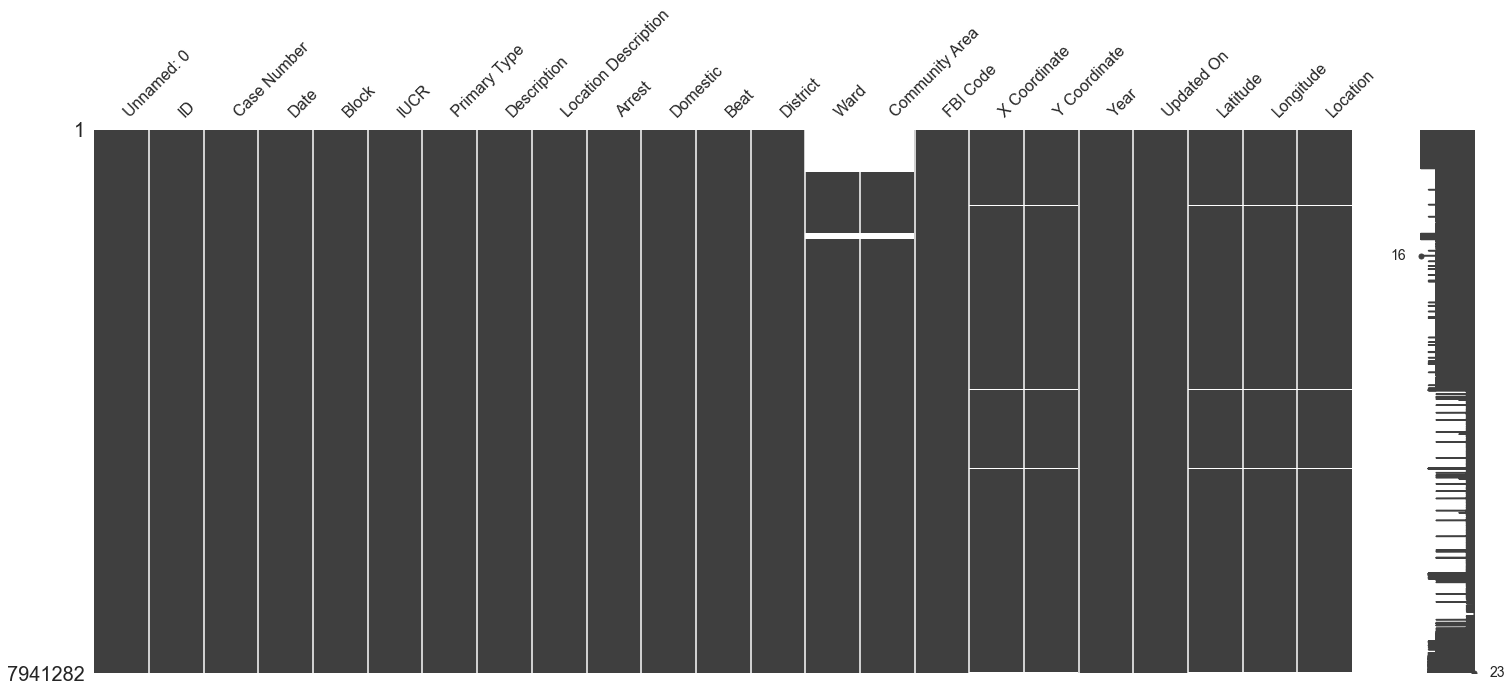

In [5]:
#https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce
msno.matrix(all_crimes)

In [6]:
all_crimes.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  7
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

In [7]:
#drop columns not being used
crimes = all_crimes.drop(columns =['Year', 'Case Number', 'Unnamed: 0', 'IUCR', 'Updated On', 'Latitude', 'Longitude'])
#drop rows with any null values
crimes.dropna(how = 'any',inplace = True)
print(crimes.shape)

(7145219, 16)


In [8]:
#Converting datetime to usable format 
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(crimes.Date)

In [9]:
print(crimes.columns)

Index(['ID', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Location'],
      dtype='object')


In [10]:
print(crimes.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7145219 entries, 2003-03-01 00:00:00 to 2016-05-03 23:38:00
Data columns (total 16 columns):
ID                      int64
Date                    datetime64[ns]
Block                   object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            object
Location                object
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 831.3+ MB
None


In [11]:
print(crimes.describe())

                 ID          Beat      District          Ward  Community Area  \
count  7.145219e+06  7.145219e+06  7.145219e+06  7.145219e+06    7.145219e+06   
mean   6.317712e+06  1.194928e+03  1.130767e+01  2.261324e+01    3.775888e+01   
std    2.290136e+06  7.034579e+02  6.937785e+00  1.378542e+01    2.156567e+01   
min    6.340000e+02  1.110000e+02  1.000000e+00  1.000000e+00    0.000000e+00   
25%    4.695696e+06  6.230000e+02  6.000000e+00  1.000000e+01    2.300000e+01   
50%    6.425439e+06  1.034000e+03  1.000000e+01  2.200000e+01    3.200000e+01   
75%    7.848320e+06  1.731000e+03  1.700000e+01  3.400000e+01    5.800000e+01   
max    1.082334e+07  2.535000e+03  3.100000e+01  5.000000e+01    7.700000e+01   

       X Coordinate  
count  7.145219e+06  
mean   1.164445e+06  
std    1.756154e+04  
min    0.000000e+00  
25%    1.152842e+06  
50%    1.165905e+06  
75%    1.176338e+06  
max    1.205119e+06  


In [12]:
print(crimes.head())

                          ID                Date                    Block  \
Date                                                                        
2003-03-01 00:00:00  4676906 2003-03-01 00:00:00          004XX W 42ND PL   
2003-05-01 01:00:00  4677901 2003-05-01 01:00:00       111XX S NORMAL AVE   
2001-01-01 11:00:00  4791194 2001-01-01 11:00:00  114XX S ST LAWRENCE AVE   
2003-03-15 00:00:00  4679521 2003-03-15 00:00:00       090XX S RACINE AVE   
2003-01-01 00:00:00  4680124 2003-01-01 00:00:00    009XX S SPAULDING AVE   

                            Primary Type                     Description  \
Date                                                                       
2003-03-01 00:00:00        OTHER OFFENSE         HARASSMENT BY TELEPHONE   
2003-05-01 01:00:00                THEFT  FINANCIAL ID THEFT:$300 &UNDER   
2001-01-01 11:00:00  CRIM SEXUAL ASSAULT                       PREDATORY   
2003-03-15 00:00:00        OTHER OFFENSE         OTHER WEAPONS VIOLATION   
2003

In [13]:
#Parse out 'Date' column
crimes['Year'] = pd.DatetimeIndex(crimes['Date']).year
crimes['Month'] = pd.DatetimeIndex(crimes['Date']).month
crimes['Day'] = pd.DatetimeIndex(crimes['Date']).day
crimes['Hour'] = pd.DatetimeIndex(crimes['Date']).hour
crimes['Minute'] = pd.DatetimeIndex(crimes['Date']).minute
crimes['Second'] = pd.DatetimeIndex(crimes['Date']).second

# Exploratory Data Analysis and Data Visualization

In [14]:
#ranked types of theft
primary_counted = crimes[['Primary Type','ID']].groupby('Primary Type').count().sort_values(['ID'], ascending = False)
primary_counted.head()

,ID
Primary Type,
THEFT,1476357
BATTERY,1298241
CRIMINAL DAMAGE,835286
NARCOTICS,796053
OTHER OFFENSE,440881


In [15]:
#Arrests per year
crimes[['Arrest', 'Year']].groupby('Year').sum()

,Arrest
Year,
2001,1034.0
2002,96185.0
2003,140284.0
2004,116098.0
2005,140281.0
2006,242970.0
2007,189932.0
2008,215899.0
2009,217301.0


In [16]:
#Converting the Location Description and Primary Type columns to category
crimes['Location Description'] = crimes['Location Description'].astype('category')
crimes['Primary Type'] = crimes['Primary Type'].astype('category')

In [17]:
crime_types = crimes['Primary Type'].value_counts()

In [18]:
crime_types_df = pd.DataFrame({'Primary Type': crime_types.index, 'Value': crime_types.values})

<Figure size 1728x864 with 0 Axes>

<BarContainer object of 34 artists>

Text(0, 0.5, 'Crime Type')

Text(0.5, 0, 'Number of Crimes')

Text(0.5, 1.0, 'Total Number of Crimes by Type')

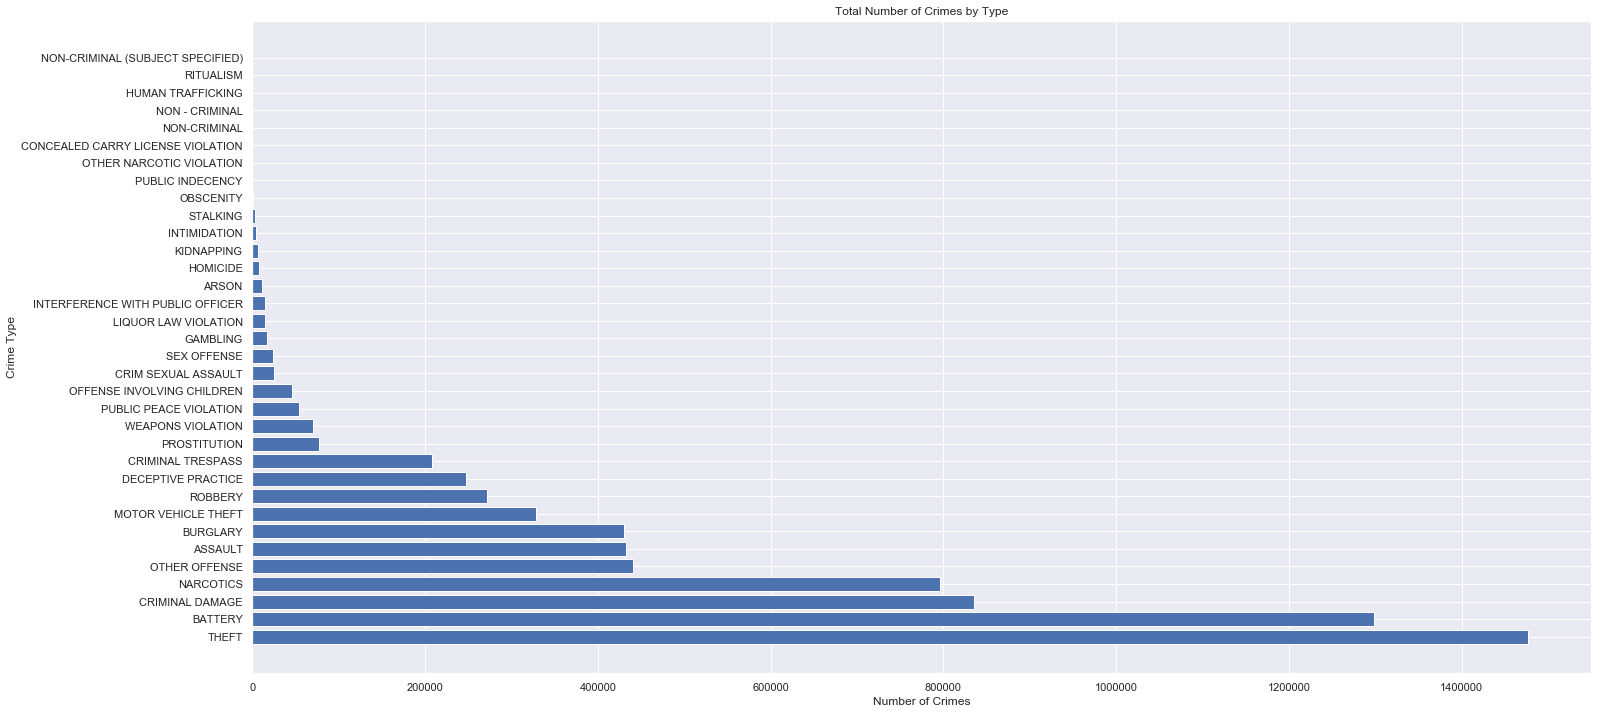

In [19]:
#Plotting the number of crimes grouped by crime type 
plt.figure(figsize=(24,12))
plt.barh(crime_types_df['Primary Type'], crime_types_df['Value'], )
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')
plt.title('Total Number of Crimes by Type')

Text(0.5, 1.0, 'Top Ten Types of Crime')

Text(0.5, 0, 'Crime Type')

Text(0, 0.5, 'Crime Frequency (In terms of number of crimes)')

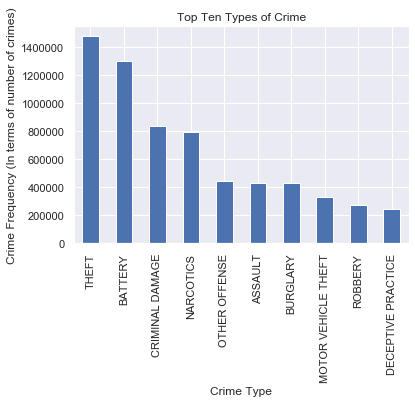

In [20]:
#Plotting the number of crimes for the top 10 crime types 
top_types = crimes['Primary Type'].value_counts()[0:10]
top_types.plot(kind='bar')
plt.title('Top Ten Types of Crime')
plt.xlabel('Crime Type')
plt.ylabel('Crime Frequency (In terms of number of crimes)')

Text(0.5, 1.0, 'Top Ten Locations of Crime')

Text(0.5, 0, 'Location Type')

Text(0, 0.5, 'Crime Frequency (In terms of number of crimes)')

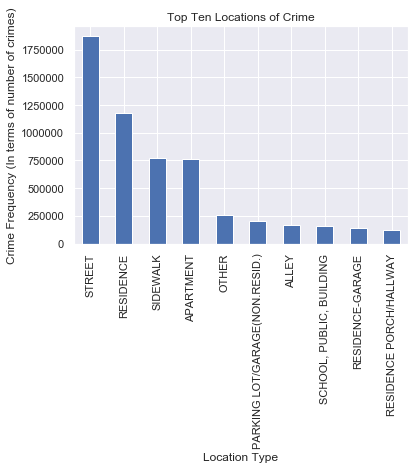

In [21]:
#Plotting the number of crimes by the top ten location types
top_locations = crimes['Location Description'].value_counts()[0:10]
top_locations.plot(kind='bar')
plt.title('Top Ten Locations of Crime')
plt.xlabel('Location Type')
plt.ylabel('Crime Frequency (In terms of number of crimes)')

In [22]:
crimes_months = crimes['Month'].value_counts()
crimes_months_df = pd.DataFrame({'Month': crimes_months.index, 'Value': crimes_months.values})

In [23]:
crimes_months_df = crimes_months_df.sort_values(by=['Month'], ascending=True)
crimes_months_df['Month'] = crimes_months_df['Month'].apply(lambda x: calendar.month_abbr[x])

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Crimes')

Text(0.5, 1.0, 'Trend of Crimes By Month')

Text(May, 650000, 'Summer Months')

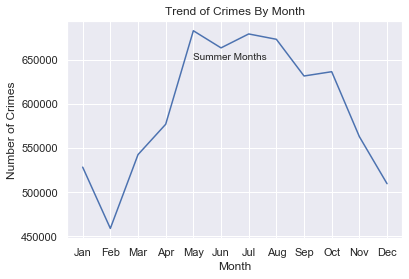

In [24]:
#Plotting the trend of crimes by month, specifically the summer months
plt.plot(crimes_months_df['Month'], crimes_months_df['Value'])
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Trend of Crimes By Month')
plt.text('May', 650000, "Summer Months")

In [25]:
crimes_years = crimes['Year'].value_counts()
crimes_years_df = pd.DataFrame({'Year': crimes_years.index, 'Value': crimes_years.values})
crimes_years_df = crimes_years_df.sort_values(by=['Year'], ascending=True)

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Crimes')

Text(0.5, 1.0, 'Trend of Crimes By Year')

Text(17.02, 30, 'Recession began')

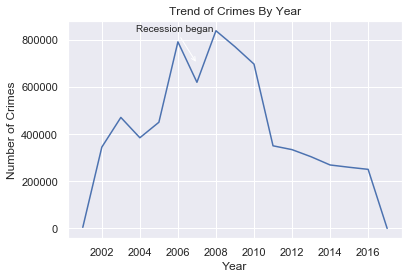

In [26]:
#Plotting the trend of the number of crimes by the year
plt.plot(crimes_years_df['Year'], crimes_years_df['Value'])
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Trend of Crimes By Year')
plt.annotate('Recession began', 
             xy=(2007, 700000),  
             xycoords='data', ha='right', va='bottom',
             xytext=(17.02, 30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Number of Crimes')

Text(0.5, 1.0, 'Crimes Each Year')

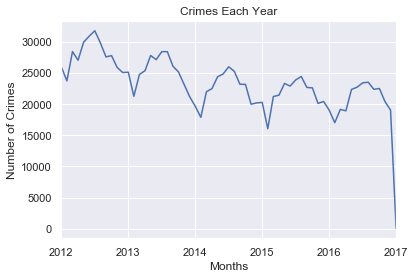

In [27]:
#crimes each year
crimes_2012_2016 = pd.DataFrame(crimes[crimes.Year >= 2012])
crimes_2012_2016.resample('M').size().plot()
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.title('Crimes Each Year')
plt.show()

In [28]:
arrests = crimes['Arrest'].value_counts()
arrests_df = pd.DataFrame({'State': arrests.index, 'Value': arrests.values})

([<matplotlib.patches.Wedge at 0x2ca4ef9a0c8>,
 [Text(-0.8528830600622427, -0.6946873295655142, 'False'),
  Text(0.8528830600622427, 0.694687329565514, 'True')],
 [Text(-0.4652089418521323, -0.37892036158118947, '71.8%'),
  Text(0.4652089418521323, 0.3789203615811894, '28.2%')])

Text(0.5, 1.0, 'Arrests and Non-Arrests Proportions')

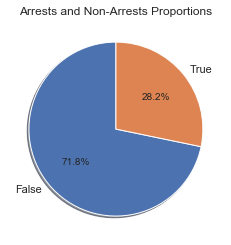

In [29]:
#The proportion of arrests vs. non-arrests
plt.pie(arrests_df.Value, labels=arrests_df.State,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Arrests and Non-Arrests Proportions')

In [30]:
arrests_True = crimes.loc[crimes.Arrest==True]

In [31]:
arrests_False = crimes.loc[crimes.Arrest==False]

In [32]:
arrests_true_year = arrests_True['Year'].value_counts()

In [33]:
arrests_false_year = arrests_False['Year'].value_counts()

In [34]:
arrests_year_df = pd.DataFrame({'Year': arrests_true_year.index, 'True': arrests_true_year.values})

In [35]:
arrests_year_df_2 = pd.DataFrame({'Year': arrests_false_year.index, 'False': arrests_false_year.values})

In [36]:
arrests_year_df = arrests_year_df.sort_values(by=['Year'], ascending=True)
arrests_year_df_2 = arrests_year_df_2.sort_values(by=['Year'], ascending=True)

In [37]:
arrests_year_df['False'] = arrests_year_df_2['False']

In [38]:
arrests_year_df.set_index('Year', inplace=True)

Text(0, 0.5, 'Number')

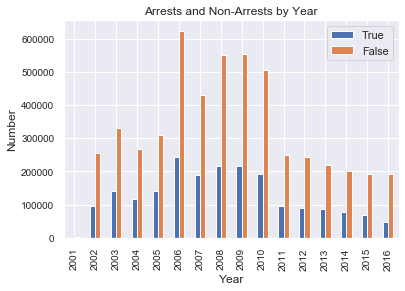

In [39]:
#Plotting the proportion of arrests vs. non-arrests by year
arrests_year_df[['True', 'False']].plot(kind='bar', title="Arrests and Non-Arrests by Year", legend=True, fontsize=10)
plt.ylabel('Number')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

([<matplotlib.axis.XTick at 0x2ca4fbab308>,
 <a list of 15 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2ca4fbaa5c8>,
 <a list of 15 Text yticklabel objects>)

Text(0.5, 1, 'Correlation of Variables')

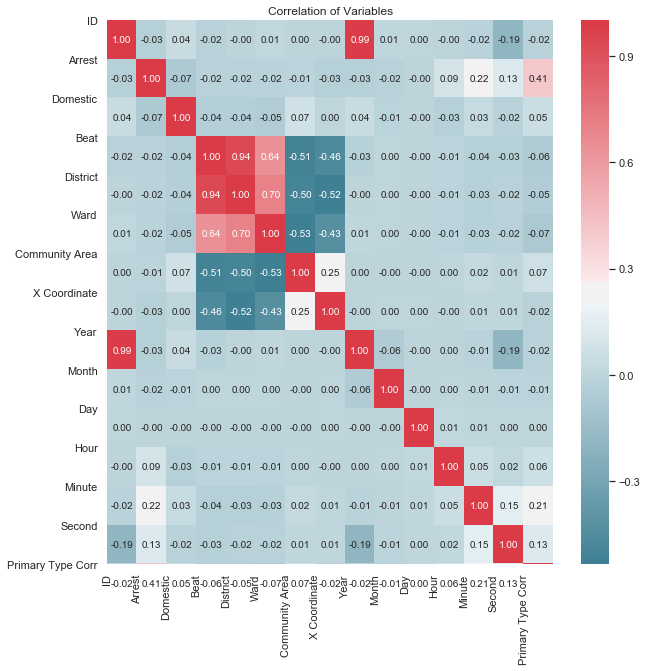

In [40]:
#Correlation of all the variables in the dataset
crimes['Primary Type Corr'] = crimes['Primary Type']
crimes['Primary Type Corr'] = pd.factorize(crimes["Primary Type Corr"])[0]
crimes['Primary Type Corr'].unique()
corr = crimes.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation of Variables')
plt.show()

In [41]:
#Stacked Bar Plot
top_types = crimes['Primary Type'].value_counts()[0:10]
df1 = crimes[['Arrest', 'Primary Type', 'ID']]
    #creating list of top types
top_types_list = top_types.index.tolist()
#top_types_list

    #filter out df1 so it only contains top 10 primary types
df2 = df1.loc[df1['Primary Type'].isin(top_types_list)]
#df2

df3 = df2.groupby(['Arrest', 'Primary Type'],as_index = False).count()
df3.dropna(how='any', inplace=True)
    #renaming Index column so it indicates count
df3.columns = ['Arrest', 'Type', 'Count']
df3 = df3.astype({'Count': int})
df3 = df3.astype({'Type': str})
#df3

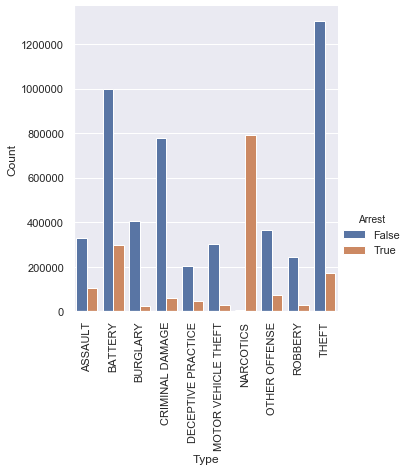

In [42]:
chart = sns.catplot(x = "Type", y = 'Count', hue = 'Arrest', 
            kind = 'bar', data = df3)
chart.set_xticklabels(rotation=90)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,X Coordinate,Y Coordinate,Location,Year,Month,Day,Hour,Minute,Second,Primary Type Corr
Date,,,,,,,,,,,,,,,,,,,,,
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,...,1173974.0,1.87676e+06,"(41.817229156, -87.637328162)",2003,3,1,0,0,0,0
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,...,1174948.0,1.83105e+06,"(41.691784636, -87.635115968)",2003,5,1,1,0,0,1
2001-01-01 11:00:00,4791194,2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,531,5.0,...,1182247.0,1.82938e+06,"(41.687020002, -87.60844523)",2001,1,1,11,0,0,2
2003-03-15 00:00:00,4679521,2003-03-15 00:00:00,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,2222,22.0,...,1169911.0,1.84483e+06,"(41.729712374, -87.653158513)",2003,3,15,0,0,0,0
2003-01-01 00:00:00,4680124,2003-01-01 00:00:00,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1134,11.0,...,1154521.0,1.89576e+06,"(41.869772159, -87.708180162)",2003,1,1,0,0,0,1
2003-06-05 00:00:00,4682244,2003-06-05 00:00:00,093XX S WALLACE ST,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2223,22.0,...,1173946.0,1.8429e+06,"(41.724330486, -87.638434248)",2003,6,5,0,0,0,1
2003-01-01 00:00:00,4684808,2003-01-01 00:00:00,060XX S KEELER AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,813,8.0,...,1149407.0,1.86416e+06,"(41.783163561, -87.727772951)",2003,1,1,0,0,0,1
2003-11-01 08:00:00,4686904,2003-11-01 08:00:00,034XX S PAULINA ST,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,922,9.0,...,1165579.0,1.88189e+06,"(41.831494381, -87.667977499)",2003,11,1,8,0,0,1
2003-11-15 09:00:00,4687321,2003-11-15 09:00:00,033XX W 63RD ST,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,823,8.0,...,1155257.0,1.86265e+06,"(41.778921304, -87.706364915)",2003,11,15,9,0,0,1


Count
Location Description Hour       
ALLEY                0      7760
                     1      5563
                     2      4628
                     3      3667
                     4      2482
                     5      1863
                     6      1725
                     7      2225
                     8      3282
                     9      3898

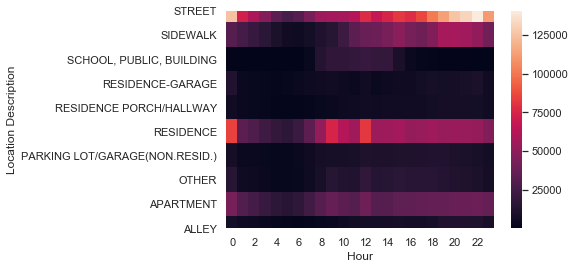

In [43]:
#Heatmap: crime occurrence by hour of the day

#first need to parse out hour from the date column. creating new column
crimes['Hour'] = pd.DatetimeIndex(crimes['Date']).hour
crimes.head(n=10)

crime_hour_df = crimes[['Location Description', 'Hour','ID']]
    #crime_hour_df.head(n=10)
crime_hour_df2 = crime_hour_df.groupby(['Location Description','Hour']).count()
    #crime_hour_df2.head()
crime_hour_df3 = crime_hour_df2.loc[top_locations.index,:]
    #renaming Index column so it indicates count
crime_hour_df3.columns = ['Count']
crime_hour_df3 = crime_hour_df3.astype({'Count': int})
crime_hour_df3.head(n=10)

#data must be in pivot table format
heatmap1_data = pd.pivot_table(crime_hour_df3, values='Count', 
                     index=['Location Description'], 
                     columns='Hour')
    #sorting
heatmap1_data.sort_index(level=0, ascending=False, inplace=True)
#heatmap1_data

ax = sns.heatmap(heatmap1_data, fmt = "d")

Count
Location Description Month       
ALLEY                1       9783
                     2       8223
                     3      11463
                     4      13682
                     5      16667
                     6      16551
                     7      17621
                     8      17320
                     9      15820
                     10     14871

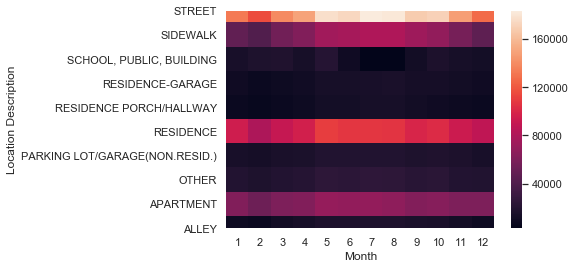

In [44]:
#Heatmap: crime occurrence by month of the year
crime_month_df = crimes[['Location Description', 'Month','ID']]
    #crime_hour_df.head(n=10)
crime_month_df2 = crime_month_df.groupby(['Location Description','Month']).count()
    #crime_hour_df2.head()
crime_month_df3 = crime_month_df2.loc[top_locations.index,:]
    #renaming Index column so it indicates count
crime_month_df3.columns = ['Count']
crime_month_df3 = crime_month_df3.astype({'Count': int})
crime_month_df3.head(n=10)

#data must be in pivot table format
heatmap2_data = pd.pivot_table(crime_month_df3, values='Count', 
                     index=['Location Description'], 
                     columns='Month')
    #sorting
heatmap2_data.sort_index(level=0, ascending=False, inplace=True)
#heatmap2_data

ax = sns.heatmap(heatmap2_data, fmt = "d")

# Further Data Preprocessing - Category Collapsing

In [45]:
    #collapsing 'Location Description' column
#first, count # of unique values
crimes['Location Description'].nunique()

170

In [46]:
    #this is how we chose to group the location description categories
groups1a = {
'Airport/Aircraft': ["AIRCRAFT", "AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA", 
    "AIRPORT BUILDING NON-TERMINAL - SECURE AREA", "AIRPORT EXTERIOR - NON-SECURE AREA", 
    "AIRPORT EXTERIOR - SECURE AREA", "AIRPORT PARKING LOT", "AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA",
    "AIRPORT TERMINAL LOWER LEVEL - SECURE AREA", "AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA", 
    "AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA", "AIRPORT TERMINAL UPPER LEVEL - SECURE AREA", 
    "AIRPORT TRANSPORTATION SYSTEM (ATS)", "AIRPORT VENDING ESTABLISHMENT", "AIRPORT/AIRCRAFT"],
'Apartment': ['APARTMENT'],
'Animal Site': ['ANIMAL HOSPITAL', 'HORSE STABLE', 'KENNEL'],
'Bank/Financial Site': ['ATM (AUTOMATIC TELLER MACHINE)', 'BANK', 'SAVINGS AND LOAN', 'CREDIT UNION', 'CURRENCY EXCHANGE', 
    'COIN OPERATED MACHINE', 'PAWN SHOP'],
'Bar/Liquor Store': ['BAR OR TAVERN', 'LIQUOR STORE', 'TAVERN/LIQUOR STORE', 'CLUB', 'TAVERN'],
'Barber': ['BARBER SHOP/BEAUTY SALON', 'BARBERSHOP'],
'Chicago Housing Authority': ['CHA APARTMENT', 'CHA GROUNDS', 'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT', 'CHA PARKING LOT/GROUNDS',
       'CHA ELEVATOR', 'CHA BREEZEWAY', 'CHA LOBBY', 'CHA HALLWAY', 'CHA', 'CHA PLAY LOT', 'CHA STAIRWELL'],
'Church': ['CHURCH', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'CHURCH PROPERTY'],
'College': ['COLLEGE/UNIVERSITY GROUNDS', 'COLLEGE/UNIVERSITY RESIDENCE HALL'],
'Chicago Transportation Authority': ['CTA BUS', 'CTA BUS STOP', 'CTA GARAGE / OTHER PROPERTY', 'CTA PLATFORM', 'CTA PROPERTY', 'CTA STATION', 
        'CTA TRACKS - RIGHT OF WAY', 'CTA TRAIN', 'CTA', 'CTA "L" TRAIN', 'CTA "L" PLATFORM'],
'Factory/Warehouse': ['FACTORY/MANUFACTURING BUILDING', 'WAREHOUSE', 'FACTORY'],
'Forest': ['FOREST PRESERVE', 'WOODED AREA'],
'Garage': ['GARAGE', 'GARAGE/AUTO REPAIR'],
'Gas Station': ['GAS STATION', 'GAS STATION DRIVE/PROP.'],
'Govt Bldg': ['GOVERNMENT BUILDING', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING'],
'Hospital/Health Site': ['HOSPITAL', 'HOSPITAL BUILDING/GROUNDS', 'MEDICAL/DENTAL OFFICE', 'NURSING HOME/RETIREMENT HOME',
                        'NURSING HOME'],
'Lake': ['BOAT/WATERCRAFT', 'RIVER BANK', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'LAKE', 'LAGOON', 'RIVER'],
'Law Enforcement': ['JAIL / LOCK-UP FACILITY', 'POLICE FACILITY/VEH PARKING LOT', 'COUNTY JAIL'],
'Cleaners/Laundry': ['CLEANERS/LAUNDROMAT', 'LAUNDRY ROOM'],
'Hotel': ['HOTEL', 'HOTEL/MOTEL', 'MOTEL'],
'Office': ['COMMERCIAL / BUSINESS OFFICE', 'OFFICE'],
'Parking Lot': ['PARKING LOT', 'PARKING LOT/GARAGE(NON.RESID.)'],
'Residence': ['HOUSE', 'RESIDENCE', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE', 'RESIDENTIAL YARD (FRONT/BACK)', 
        'PORCH', 'YARD', 'DRIVEWAY', 'DRIVEWAY - RESIDENTIAL', 'POOL ROOM', 'BASEMENT'],
'Restaurant/Movies': ['RESTAURANT', 'MOVIE HOUSE/THEATER'],
'Retail': ['APPLIANCE STORE', 'DEPARTMENT STORE', 'CLEANING STORE', 'DRUG STORE', 'RETAIL STORE', 
           'SMALL RETAIL STORE', 'CONVENIENCE STORE'],
'Road': ['BRIDGE', 'HIGHWAY/EXPRESSWAY', 'STREET', 'EXPRESSWAY EMBANKMENT'],
'School': ['SCHOOL, PRIVATE, BUILDING', 'SCHOOL, PRIVATE, GROUNDS', 'SCHOOL, PUBLIC, BUILDING', 'SCHOOL, PUBLIC, GROUNDS',
          'PUBLIC GRAMMAR SCHOOL', 'SCHOOL YARD', 'PUBLIC HIGH SCHOOL'],
'Truck Site': ['TRUCK', 'DELIVERY TRUCK', 'TRUCKING TERMINAL', 'DELIVERY TRUCK', 'LOADING DOCK',
              'VEHICLE - DELIVERY TRUCK'],
'Vacant Lot': ['VACANT LOT', 'VACANT LOT/LAND'],
'Transport Site': ['AUTO', 'TAXICAB', 'TAXI CAB', 'VEHICLE - DELIVERY TRUCK', 
    'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)','VEHICLE NON-COMMERCIAL', 'VEHICLE-COMMERCIAL', 
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS', 'VEHICLE-COMMERCIAL - TROLLEY BUS', 'CAR WASH', 
    'AUTO / BOAT / RV DEALERSHIP', 'OTHER COMMERCIAL TRANSPORTATION', 'LIVERY AUTO', 'VEHICLE - OTHER RIDE SERVICE',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'RAILROAD PROPERTY', 'LIVERY STAND OFFICE'],
'Waste Site': ['SEWER', 'JUNK YARD/GARBAGE DUMP', 'DUMPSTER'],
'Youth/Sports Site': ['DAY CARE CENTER', 'YMCA', 'ATHLETIC CLUB', 'SPORTS ARENA/STADIUM']
 }

In [47]:
crimes['Location Description'] = pycats.cat_collapse(crimes['Location Description'], groups1a)
crimes['Location Description'].nunique()

56

In [48]:
    #viewing top locations
top_locations = crimes['Location Description'].value_counts()[0:11]
#top_locations
    #want to remove OTHER from this top 10 list, b/c it's not meaningful
original_other = top_locations.index[4]
#original_other
top_locations = top_locations.drop(top_locations.index[4])
top_locations

Road                         1869462
Residence                    1545317
SIDEWALK                      767845
Apartment                     759648
OTHER                         257795
School                        205271
Parking Lot                   200495
ALLEY                         164167
Transport Site                146237
Chicago Housing Authority     109540
Name: Location Description, dtype: int64

In [49]:
    #viewing all other locations that were not in the top 10
all_other_locations = crimes['Location Description'].value_counts()[11:]

In [50]:
    #lumping all the non-top 10 categories into other category, giving us total of 11 categories
crimes['Location Description'] = pycats.cat_lump(crimes['Location Description'], n=10)

In [51]:
groups1b = {
    'Road': ['Road'], 'Residence': ['Residence'], 'Sidewalk': ['SIDEWALK'], 'Apartment': ['Apartment'],
    'Retail': ['Retail'], 'School': ['School'], 'Parking Lot': ['Parking Lot'], 'Alley': ['ALLEY'],
    'Transport Site': ['Transport Site'], 'Chicago Housing Authority': ['Chicago Housing Authority'],
    'Other': ['OTHER', 'Other']
}

In [52]:
    #collapsing to give us total of 10 categories, including other
crimes['Location Description'] = pycats.cat_collapse(crimes['Location Description'], groups1b)
crimes['Location Description'].nunique()

10

In [53]:
    #collapsing 'Primary Type' column
crimes['Primary Type Test'] = crimes['Primary Type']
crimes['Primary Type Test'] = crimes['Primary Type Test'].astype('category')
crimes['Primary Type Test'].nunique()

34

In [54]:
groups2 = {
    'THEFT': ['MOTOR VEHICLE THEFT', 'THEFT', 'ROBBERY', 'BURGLARY'],
    'WEAPONS VIOLATION': ['WEAPONS VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION'],
    'NON-CRIMINAL': ['NON-CRIMINAL', 'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'],
    'NARCOTICS': ['NARCOTICS', 'OTHER NARCOTIC VIOLATION'],
    'SEX OFFENSE': ['CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'OBSCENITY', 'PUBLIC INDECENCY']
}

In [55]:
    #collapsing
crimes['Type_factor'] = crimes['Primary Type Test']
crimes['Type_factor'] = pycats.cat_collapse(crimes['Type_factor'], groups2)
crimes['Type_factor'] = pd.factorize(crimes['Type_factor'])[0]
crimes['Type_factor'].nunique()

24

In [56]:
            # Time Series Analysis
# Reference: towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

#dropped 2017 to no skew time-series data
crimes_no2017 = crimes[crimes['Year'] != 2017]

In [57]:
# we will use the averages daily sales value for that month instead
y = crimes_no2017['Arrest'].resample('M').mean()

In [58]:
# Let's look at y 2016 as an example
y['2016':]

Date
2016-01-31    0.203368
2016-02-29    0.225765
2016-03-31    0.231548
2016-04-30    0.239269
2016-05-31    0.215559
2016-06-30    0.203746
2016-07-31    0.181291
2016-08-31    0.162200
2016-09-30    0.169538
2016-10-31    0.167155
2016-11-30    0.164431
2016-12-31    0.161563
Freq: M, Name: Arrest, dtype: float64

Text(0.5, 1.0, 'Trend of Arrest By Year')

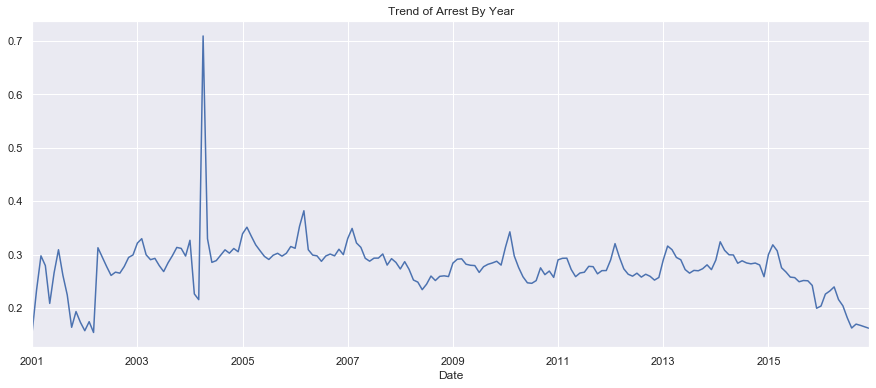

In [59]:
y.plot(figsize=(15, 6))
plt.title('Trend of Arrest By Year')
plt.show()

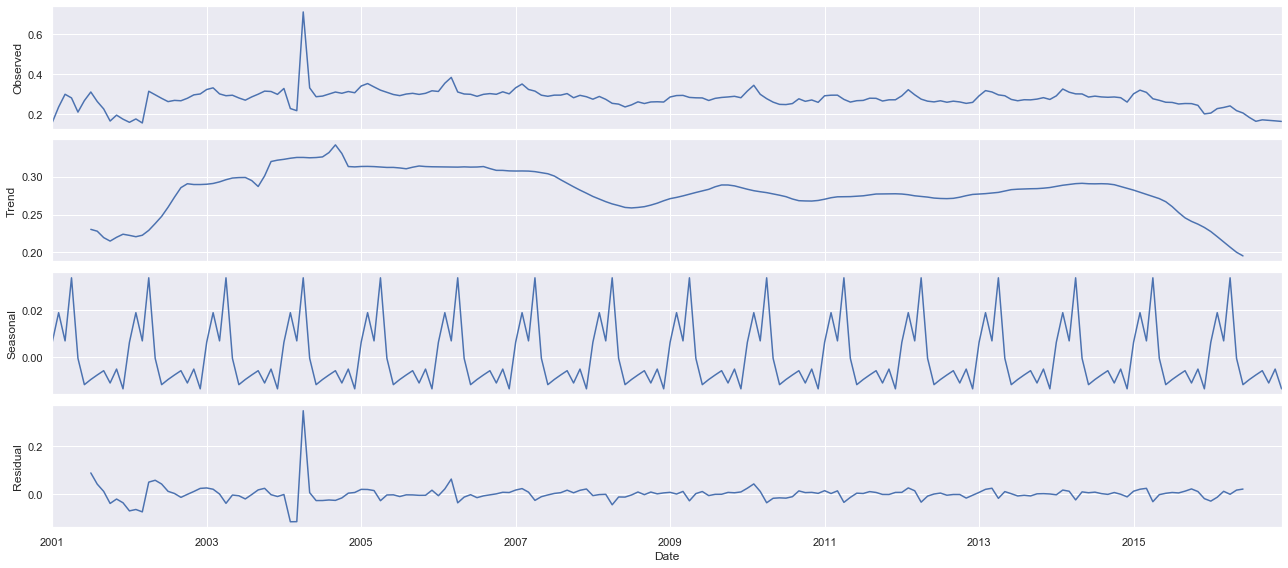

In [60]:
# We can also visualize our data using a method called time-series decomposition
# Allows us to decompose our time series into three distinct components: trend, seasonality, and noise.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [61]:
# ARIMA(p, d, q) -> parameters account for seasonality, trend, and noise in data
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [62]:
# GridSearch to find the optimal set of parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:60.451244787231644
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-124.254803355577
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-490.2064256433322
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-514.0504554120068
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-495.4955181650863
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-535.3977838118153
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-498.63653524468805
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-515.2315059097263
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-149.33659061558197
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-254.06776286213915
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-499.58868456103284
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-539.206850398694
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-508.7194519248643
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-566.4100079745468
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-514.5841348367196
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-536.0464964900873
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-588.9383517762151
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-546.7587

In [63]:
# ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-651.6679029041914 has the lowest AIC level
time_series_model = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = time_series_model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9982      0.005    220.243      0.000       0.989       1.007
ma.L1         -0.7574      0.052    -14.453      0.000      -0.860      -0.655
sigma2         0.0018   7.35e-05     24.888      0.000       0.002       0.002


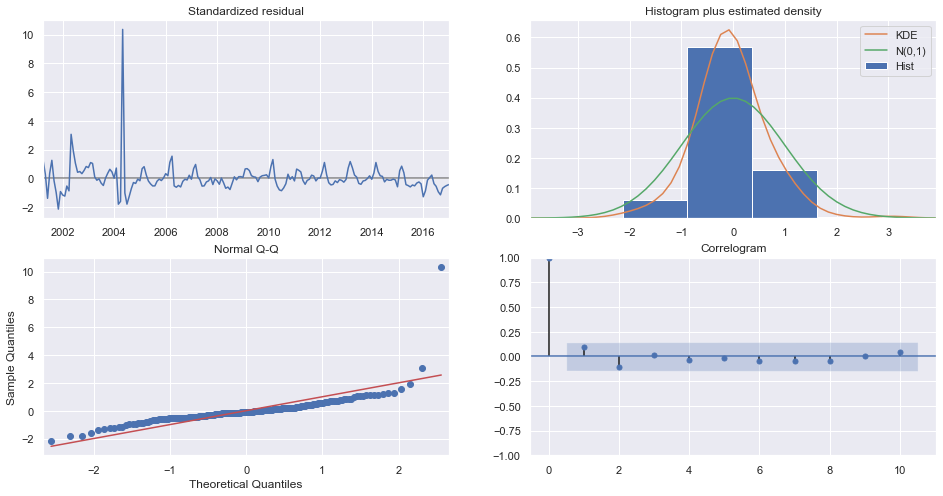

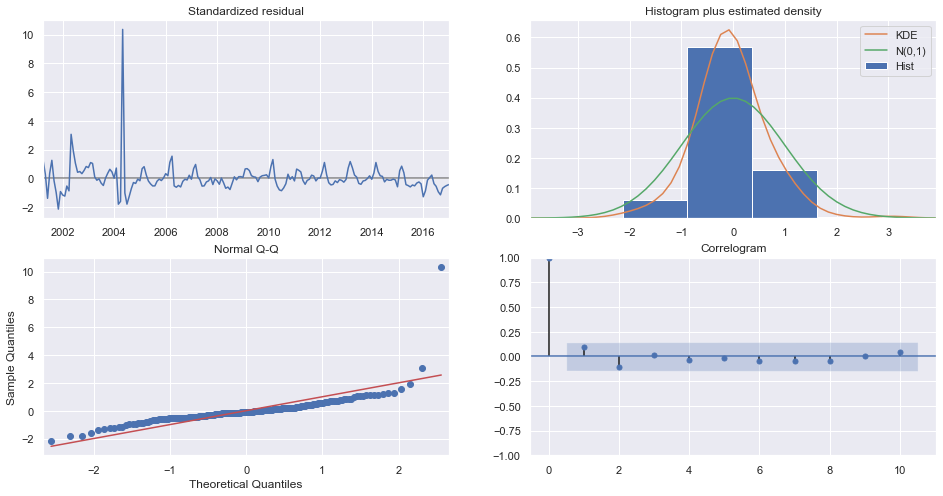

In [64]:
# model diagnostics to investigate any unusual behavior
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Arrests')

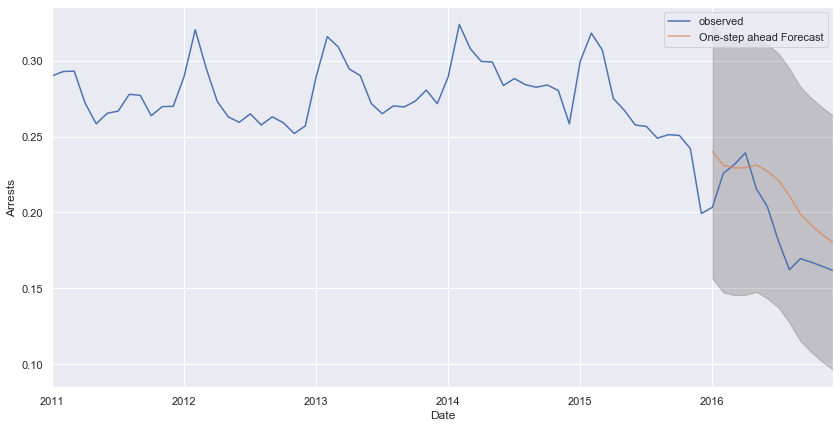

In [65]:
# Accuracy of our forecasts
# Compare predicted Arrests to real Arrest of the time series
# Set forecasts to start at 2016–01–31 to the end of the data
pred = results.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Arrests')
plt.legend()
plt.show()

# forecasts align with the true values somewhat well
# Shows a downward trend starts from the beginning 2016 of the year.

In [66]:
crimes.to_csv('final_crimes.csv')